# A Modular Active Learning

"""
Learning the shape of an object using uncertainty based sampling.
In this example, we will demonstrate the use of ActiveLearner with
the scikit-learn implementation of the kNN classifier algorithm.
"""

Reference: https://github.com/modAL-python/modAL

In [3]:
pip install modAL

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner

In [5]:
# creating the image
im_width = 500
im_height = 500
data = np.zeros((im_height, im_width))
data[100:im_width-1 - 100, 100:im_height-1 - 100] = 1

In [6]:
# create the pool from the image
X_full = np.transpose(
    [np.tile(np.asarray(range(data.shape[0])), data.shape[1]),
     np.repeat(np.asarray(range(data.shape[1])), data.shape[0])]
)
# map the intensity values against the grid
y_full = np.asarray([data[P[0], P[1]] for P in X_full])
X_pool = deepcopy(X_full)
y_pool = deepcopy(y_full)

In [7]:
# assembling initial training set
initial_idx = [0, im_height-1, im_height*(im_height-1), -1, im_width//2 + im_height//2*im_height]
X_train, y_train = X_pool[initial_idx], y_pool[initial_idx]

In [8]:
# create an ActiveLearner instance
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train
)
initial_prediction = learner.predict_proba(X_full)[:, 1].reshape(im_height, im_width)

In [9]:
n_queries = 100
uncertainty_sampling_accuracy = list()

In [10]:
for round_idx in range(n_queries):
    query_idx, query_inst = learner.query(X_pool)
    learner.teach(X_pool[query_idx].reshape(1, -1), y_pool[query_idx].reshape(-1, ))
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    uncertainty_sampling_accuracy.append(learner.score(X_full, y_full))

In [11]:
uncertainty_sampling_accuracy

[0.793116,
 0.779848,
 0.8032,
 0.75952,
 0.820236,
 0.816856,
 0.784296,
 0.758348,
 0.750372,
 0.800868,
 0.81606,
 0.810344,
 0.821988,
 0.913708,
 0.948028,
 0.905348,
 0.945628,
 0.939704,
 0.941468,
 0.944664,
 0.946344,
 0.909152,
 0.945304,
 0.944696,
 0.943436,
 0.947244,
 0.947016,
 0.947884,
 0.949244,
 0.94958,
 0.955892,
 0.955604,
 0.955604,
 0.951584,
 0.951584,
 0.977472,
 0.990312,
 0.992844,
 0.9845,
 0.986124,
 0.995624,
 0.997612,
 0.997604,
 0.997612,
 0.997612,
 0.997792,
 0.998564,
 0.99876,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.998804,
 0.99882,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [12]:
final_prediction = learner.predict_proba(X_full)[:, 1].reshape(im_height, im_width)

In [13]:
final_prediction

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Comparison with random sampling


In [14]:
def random_sampling(classsifier, X):
    return np.random.randint(len(X))

In [15]:
X_pool = deepcopy(X_full)
y_pool = deepcopy(y_full)

In [16]:
# learning with randomly selected queries instead of active learning
random_learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=random_sampling,
    X_training=X_train, y_training=y_train
)

In [17]:
random_sampling_accuracy = list()
for round_idx in range(n_queries):
    print(round_idx)
    query_idx, query_inst = learner.query(X_pool)
    random_learner.teach(X_pool[query_idx].reshape(1, -1), y_pool[query_idx].reshape(-1, ))
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    random_sampling_accuracy.append(random_learner.score(X_full, y_full))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


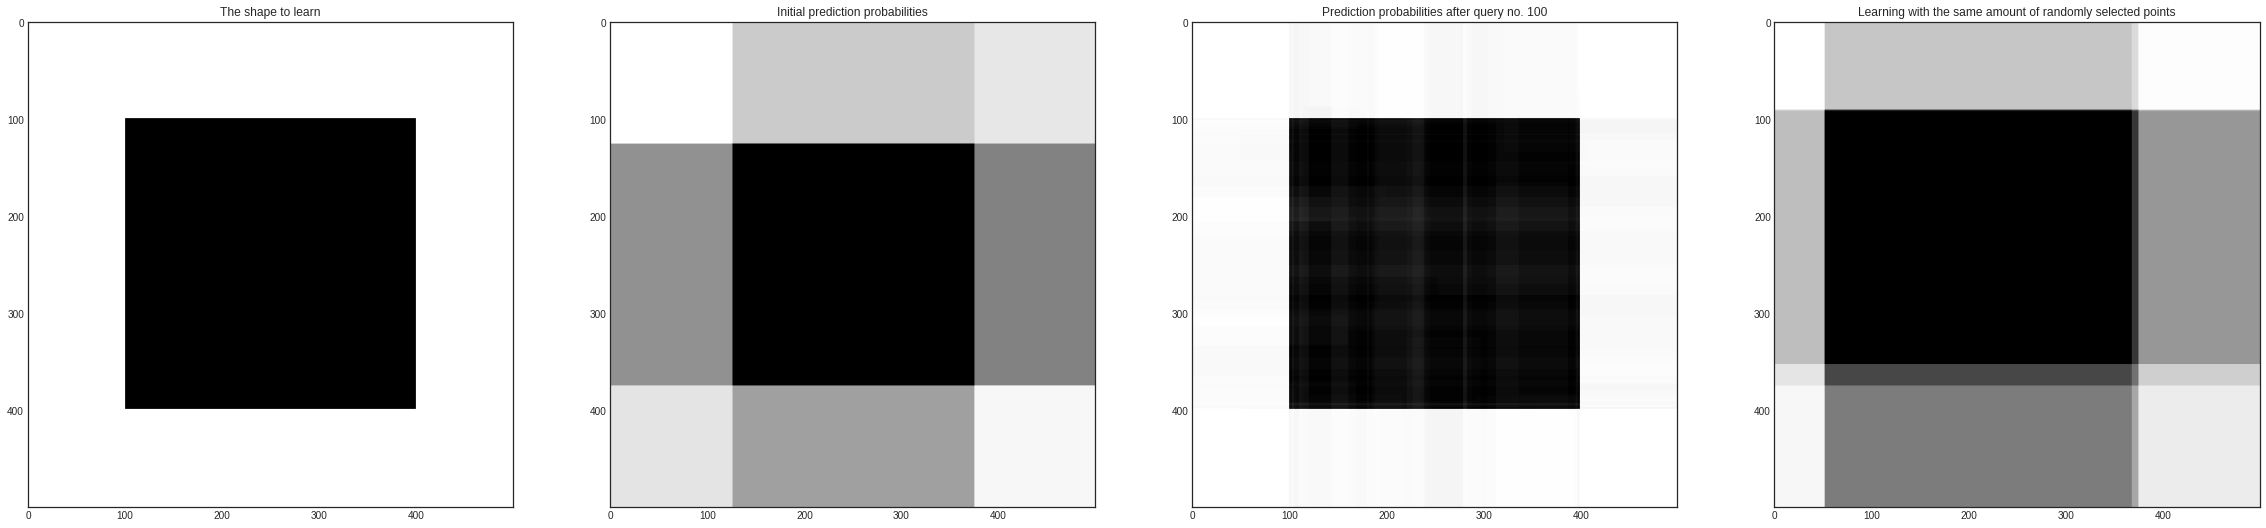

In [18]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(40, 10))
    plt.subplot(1, 4, 1)
    plt.imshow(data)
    plt.title('The shape to learn')
    plt.subplot(1, 4, 2)
    plt.imshow(initial_prediction)
    plt.title('Initial prediction probabilities')
    plt.subplot(1, 4, 3)
    plt.imshow(final_prediction)
    plt.title('Prediction probabilities after query no. %d' % n_queries)
    plt.subplot(1, 4, 4)
    plt.imshow(random_learner.predict_proba(X_full)[:, 1].reshape(im_height, im_width))
    plt.title('Learning with the same amount of randomly selected points')
    plt.show()

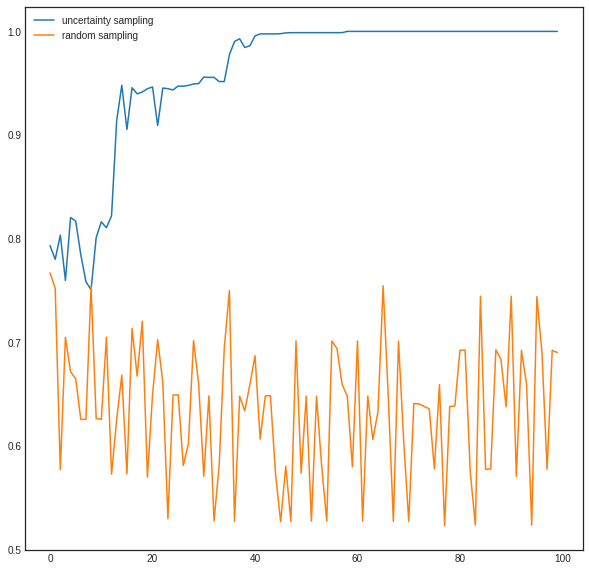

In [19]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 10))
    plt.plot(list(range(len(uncertainty_sampling_accuracy))), uncertainty_sampling_accuracy, label="uncertainty sampling")
    plt.plot(list(range(len(random_sampling_accuracy))), random_sampling_accuracy, label="random sampling")
    plt.legend()
    plt.show()